In [3]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [5]:
# Define image dimensions
img_height, img_width = 224, 224

In [6]:
# Paths to training and validation data
train_dir = 'data/train'
val_dir = 'data/validation'

In [7]:
def display_sample_images(data_dir, num_samples=3):
    classes = os.listdir(data_dir)
    
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        image_files = os.listdir(class_dir)
        sample_images = random.sample(image_files, num_samples)
        
        print(f"Sample images for class: {cls}")
        for img_file in sample_images:
            img_path = os.path.join(class_dir, img_file)
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            plt.show()

Training Data Sample Images:
Sample images for class: Bacterial Blight Disease


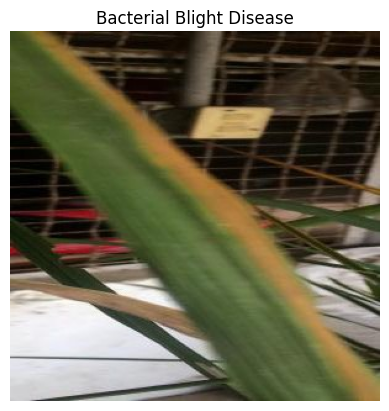

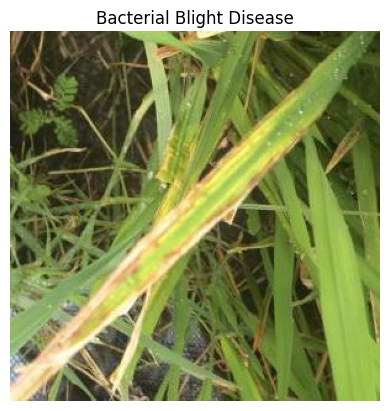

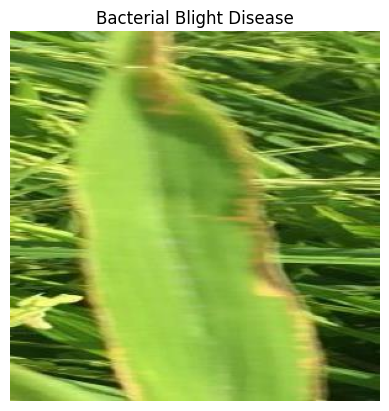

Sample images for class: Bacterial leaf blight


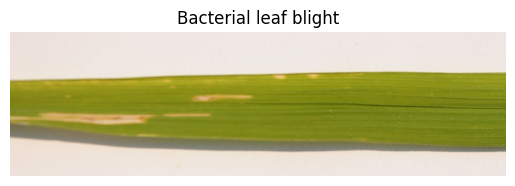

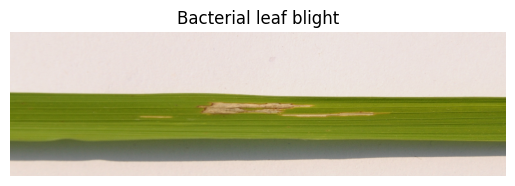

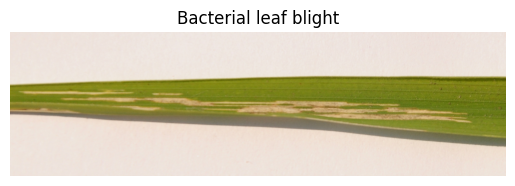

Sample images for class: Blast Disease


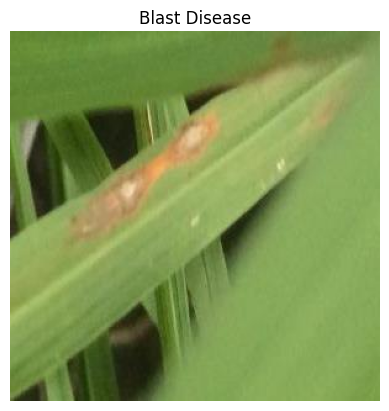

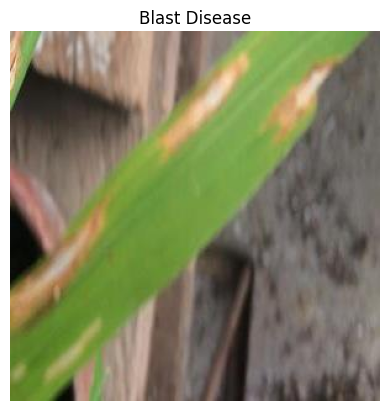

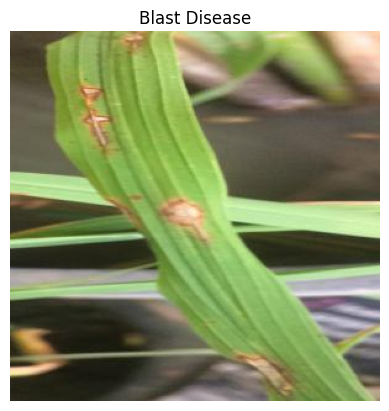

Sample images for class: Brown spot


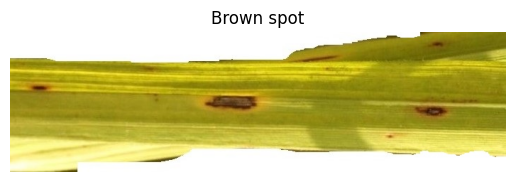

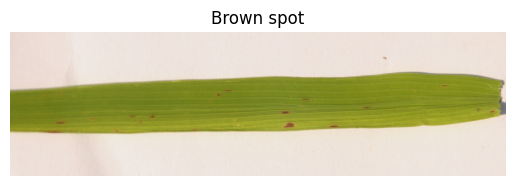

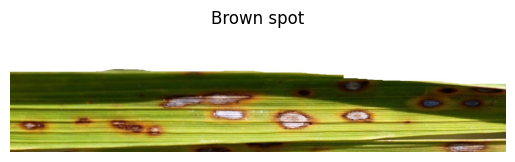

Sample images for class: Brown Spot Disease


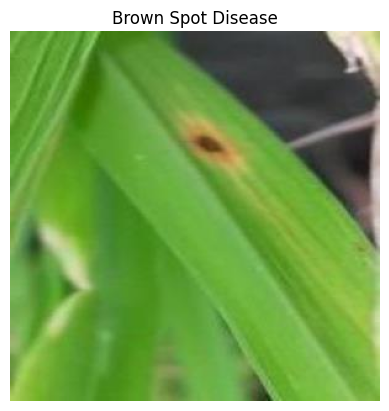

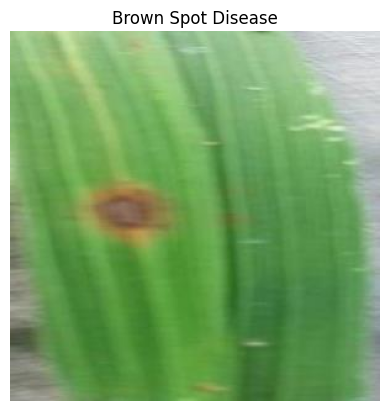

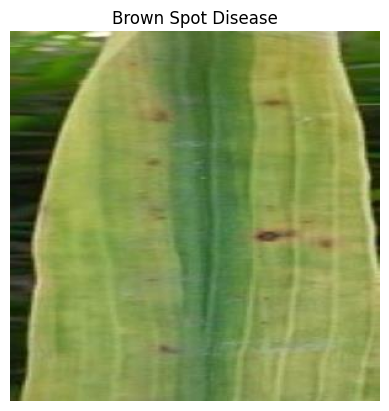

Sample images for class: False Smut Disease


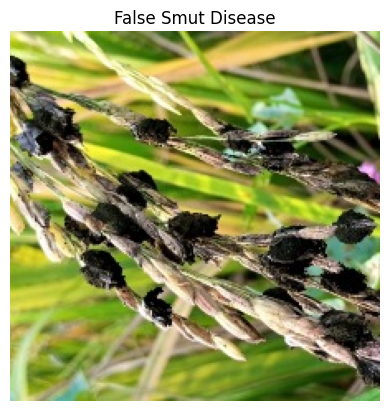

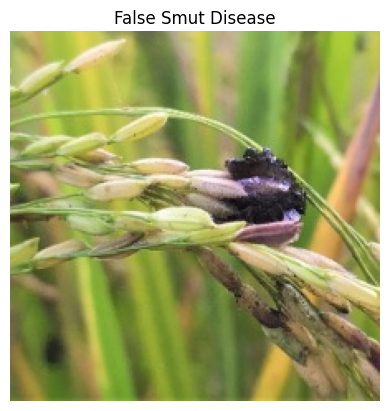

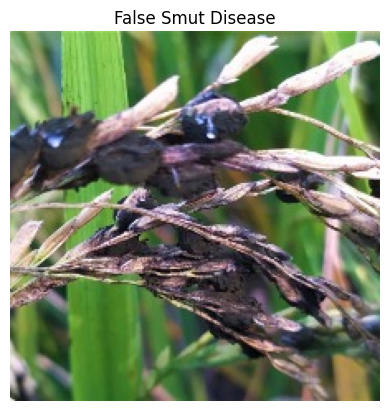

Sample images for class: Leaf smut


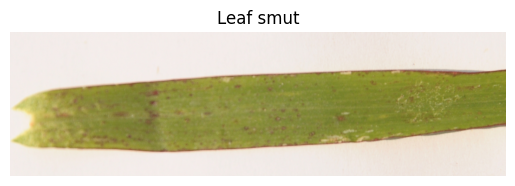

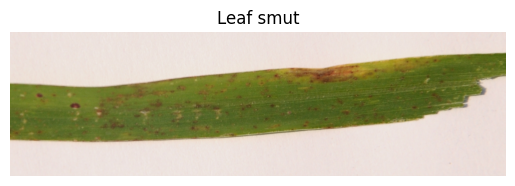

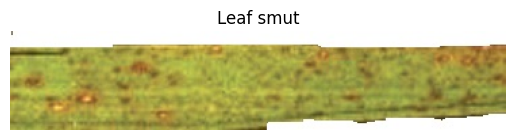

In [8]:
# Display sample images for training and validation data
print("Training Data Sample Images:")
display_sample_images(train_dir)

Validation Data Sample Images:
Sample images for class: Bacterial Blight Disease


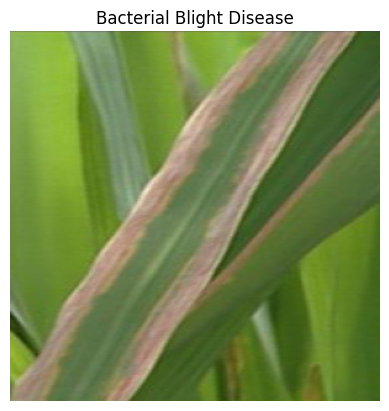

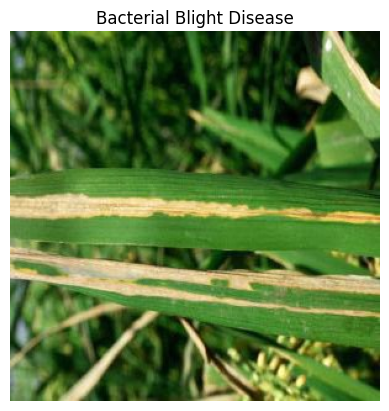

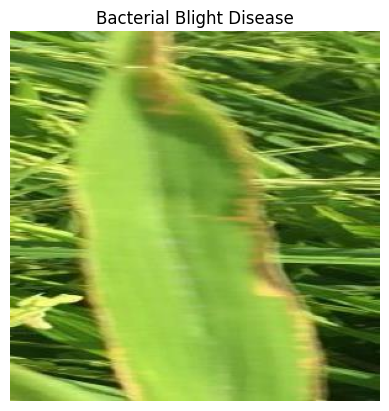

Sample images for class: Bacterial leaf blight


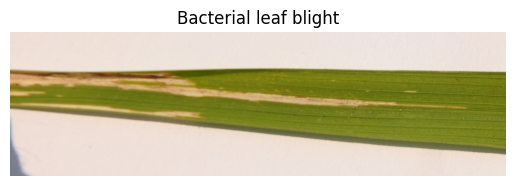

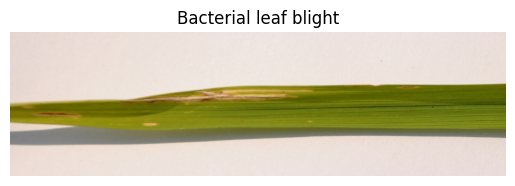

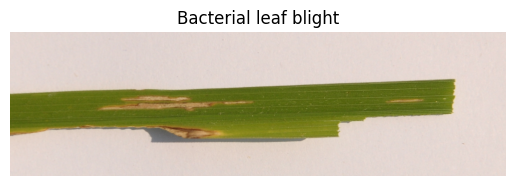

Sample images for class: Blast Disease


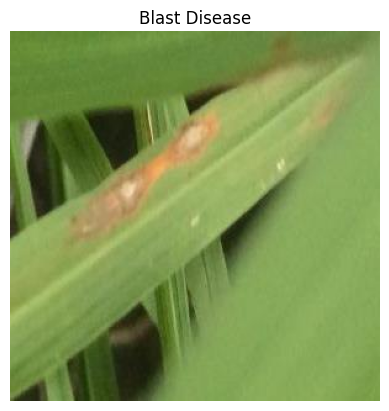

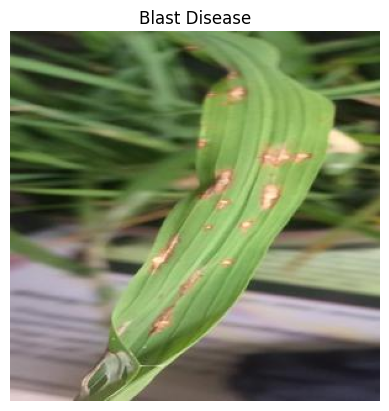

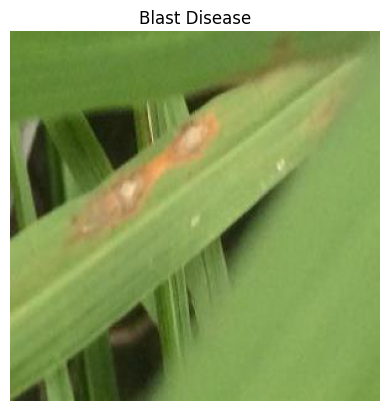

Sample images for class: Brown spot


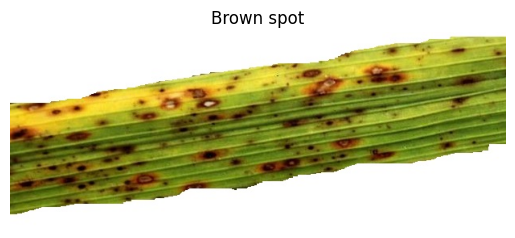

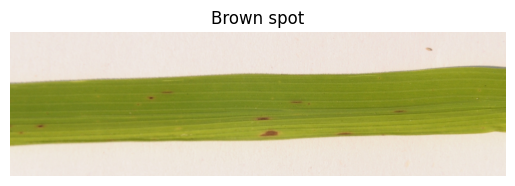

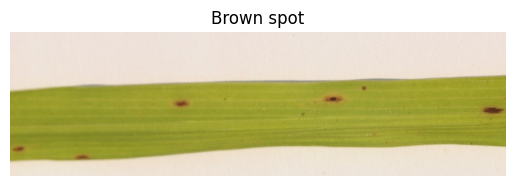

Sample images for class: Brown Spot Disease


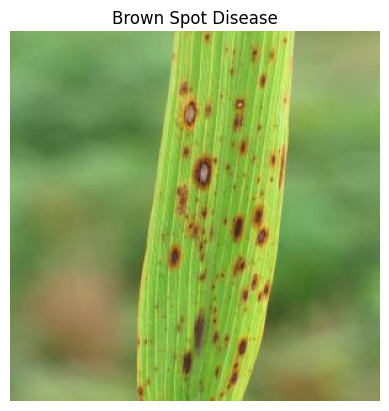

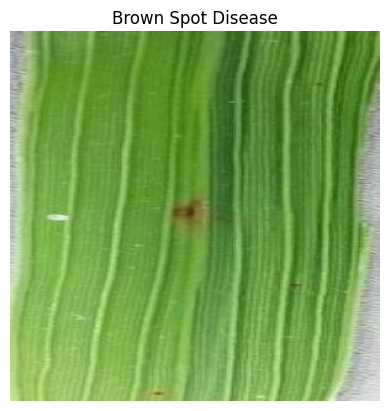

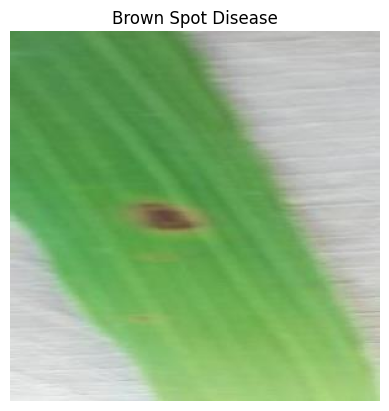

Sample images for class: False Smut Disease


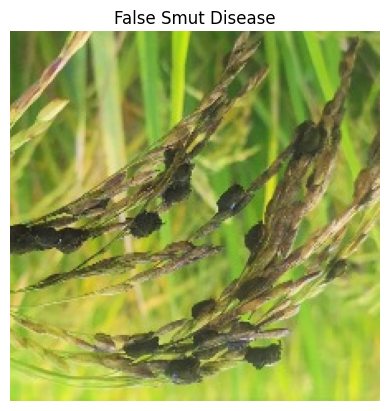

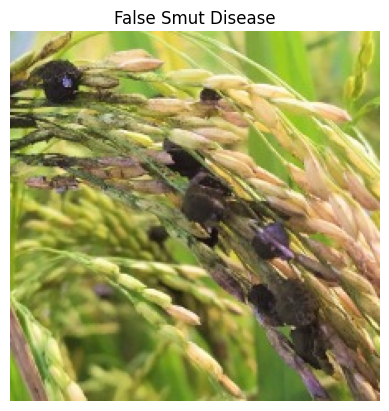

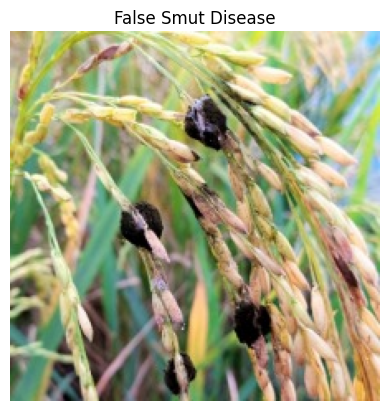

Sample images for class: Leaf smut


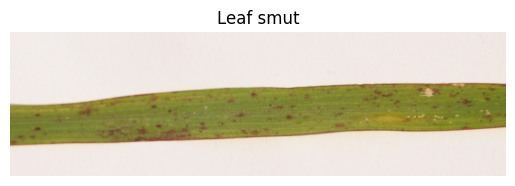

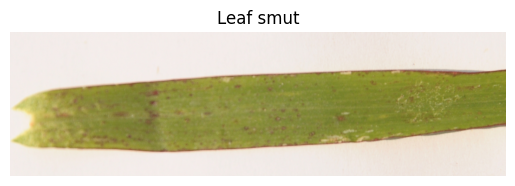

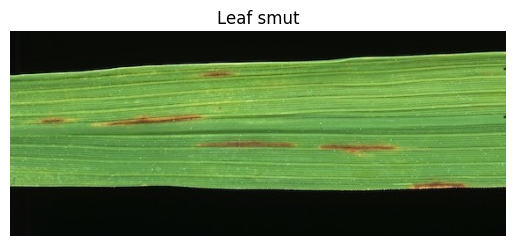

In [9]:
print("Validation Data Sample Images:")
display_sample_images(val_dir)

In [10]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [11]:
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 320 images belonging to 7 classes.


In [12]:

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

Found 320 images belonging to 7 classes.


In [13]:

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


c:\Users\koppa\Desktop\RiceCropDiseaseDetection\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [15]:
# Add global average pooling layer and a fully connected layer with softmax activation
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)


In [16]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


In [17]:

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
# Train the model
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1713 - loss: 2.4122

c:\Users\koppa\Desktop\RiceCropDiseaseDetection\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.1714 - loss: 2.4084 - val_accuracy: 0.1562 - val_loss: 1.8666
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2077 - loss: 1.9974 - val_accuracy: 0.2875 - val_loss: 1.8508
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.2219 - loss: 1.9167 - val_accuracy: 0.2625 - val_loss: 1.7507
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.3484 - loss: 1.8034 - val_accuracy: 0.4187 - val_loss: 1.6347
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.3872 - loss: 1.5766 - val_accuracy: 0.4313 - val_loss: 1.5992
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.4158 - loss: 1.5982 - val_accuracy: 0.3969 - val_loss: 1.6167
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.3009 - loss: 1.6198 - val_accuracy: 0.3969 - val_loss: 1.4840
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.3424 - loss: 1.5849 - val_accuracy: 0.4406 - val_loss: 1.4451
Epo

In [22]:
# Save the  classifier model
model.save('backend/model/rice_disease_model.h5')